In [1]:
import seaborn as sns
from pandas import Series, DataFrame
import  numpy as np
import numpy.linalg as npl
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. Load the charts.csv dataset into Python as a pandas DataFrame. Include the arguments
parse_dates=True in the read_csv function to convert the date strings into datetime objects.
Describe the data. Comment on the size of the dataset and the type of data in each column.

In [2]:
path = 'E:/UCD lesson/python/assessed/'
Artist= pd.read_csv(path+'charts.csv',encoding="unicode_escape")
print(Artist)
data_time=Artist.loc[:,'date']
Artist['date']=pd.to_datetime(Artist['date'])
Artist.info()


        rank                                 song                     artist  \
0          1                               Butter                        BTS   
1          2                             Good 4 U             Olivia Rodrigo   
2          3                           Levitating  Dua Lipa Featuring DaBaby   
3          4                         Kiss Me More     Doja Cat Featuring SZA   
4          5       Montero (Call Me By Your Name)                  Lil Nas X   
...      ...                                  ...                        ...   
328482    96                        Over And Over            Thurston Harris   
328483    97                     I Believe In You            Robert & Johnny   
328484    98                      Little Serenade          The Ames Brothers   
328485    99  I'll Get By (As Long As I Have You)             Billy Williams   
328486   100                                 Judy            Frankie Vaughan   

        last-week  peak-rank  weeks-on-

In [3]:
#A
data1= Artist.drop_duplicates(subset=['date'], keep=False)
data2=Artist.drop_duplicates(subset=['date'],keep='first')
print(data2['date'])
print('the number of different dates are included in he data set is', data2['date'].count())
#B
time_artist= Artist.drop_duplicates(subset=['artist'], keep=False)
print(time_artist['artist'])
print(time_artist['artist'].count())


#C
df=Artist.artist.value_counts()
print(df)
print(df.head(10))

#D
print('the maximum length of time a song featured in the charts , then ame of this song and the artist are divided')
print(Artist['weeks-on-board'][Artist['weeks-on-board'].idxmax()])
print('song:',Artist['song'][Artist['weeks-on-board'].idxmax()])
print('Artist:',Artist['artist'][Artist['weeks-on-board'].idxmax()])
'''#Display all columns
pd.set_option('display.max_columns', None)
#Display all rows
pd.set_option('display.max_rows', None)'''

0        2021-07-17
100      2021-07-10
200      2021-07-03
300      2021-06-26
400      2021-06-19
            ...    
327987   1958-09-01
328087   1958-08-25
328187   1958-08-18
328287   1958-08-11
328387   1958-08-04
Name: date, Length: 3285, dtype: datetime64[ns]
the number of different dates are included in he data set is 3285
13                                   Aaron Lewis
48                  Brent Faiyaz Featuring Drake
72        Big Red Machine Featuring Taylor Swift
80           G Herbo Featuring Polo G & Lil Tjay
81                         Wizkid Featuring Tems
                           ...                  
328455                            The Honeycones
328457                              Frank Gallup
328471                             The Daddy-O's
328482                           Thurston Harris
328486                           Frankie Vaughan
Name: artist, Length: 754, dtype: object
754
Taylor Swift                                 1022
Elton John                      

"#Display all columns\npd.set_option('display.max_columns', None)\n#Display all rows\npd.set_option('display.max_rows', None)"

3. Determing how many missing values there are in each column of the dataset. Can you think
of a reason why why these values are missing? Replace any missing values in the last-week
column with the integer 101. Is this a reasonable value to replace the missing values with?

In [4]:
col_null=Artist.isnull().any()
print(col_null)
Sum=Artist["last-week"].isnull().sum()
print(Sum)
Artist.fillna(101,inplace=True)
print(Artist['last-week'])
A_max=Artist['last-week'].max()
print(A_max)
count=0
for i in Artist['last-week']:
    if i==101:
        count=count+1
print('',count)


rank              False
song              False
artist            False
last-week          True
peak-rank         False
weeks-on-board    False
date              False
dtype: bool
32065
0           1.0
1           2.0
2           4.0
3           3.0
4           8.0
          ...  
328482    101.0
328483    101.0
328484    101.0
328485    101.0
328486    101.0
Name: last-week, Length: 328487, dtype: float64
101.0
 32065


total 32065 value in colume of the 'last week'
the column of 'last-week' have lot of null value  ,A total of 32065 values were replaced with 101
One reason that comes to mind is the human quota oversight that causes data to be forgotten to be imported. 
Another reason is that the singer's work, which has only been on the list once, means that the previous records are not available
 Personally, it is not reasonable to replace all the missing values with 101, because the ranking inside is between 1-100 as observed by the data. Therefore, we can infer that the list is showing the top 100 songs

4. For each entry compute the difference between its rank last week and its current rank. Add
the change in ranking as an additional column to the DataFrame. Create a numerical summary of change in ranking (mean, standard deviation, minimum, maximum, etc.) and interpret your results.


In [5]:
difference=Artist['last-week'].sub(Artist['rank'],fill_value=101)
Artist['Rank_new']=difference
pd.set_option('display.max_columns', None)
print(Artist['Rank_new'].describe())


count    328487.000000
mean          2.312746
std          12.803091
min         -80.000000
25%          -3.000000
50%           1.000000
75%           7.000000
max         100.000000
Name: Rank_new, dtype: float64


 5.create a scatter plot of the current rank versus the change in ranking from the previous week.
Describe and interpret the plot. Compute the correlation coefficient between the current rank
and the change in ranking. Does is agree with your what you found in your plot?


-0.04822847116861352


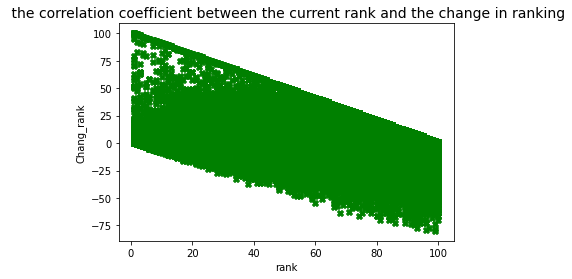

In [6]:
plt.figure()
plt.scatter(Artist['rank'],Artist['Rank_new'],color='g',linestyle='None',marker='X')
plt.ylabel('Chang_rank',fontsize=10)
plt.xlabel('rank',fontsize=10)
plt.title(' the correlation coefficient between the current rank and the change in ranking',fontsize=14)
print(Artist['rank'].corr(Artist['Rank_new']))


6. Songs will typically appear in the charts for a number of weeks, as such, there are a number
of duplicate entries. Delete all duplicate entries, keeping only the most recent entries of a
particular song by a particular artist in the charts. How many unique songs (with unique
artists) have appeared in the charts since its inception in 1958? Repeat Q2C for the new
DataFrame, with unique entries only. Are the top 10 entries the same? If not, discuss why
they may have changed.You may find the pandas method drop_duplicates useful. See the pandas documentation
for details on how to apply this method to a DataFrame.


In [7]:
Artist.drop_duplicates(subset=['song','artist'],keep='first',inplace=True)
pd.set_option('display.max_columns', None)
product=Artist['artist'].value_counts()
print(product,'\n')
product_10=Artist['artist'].value_counts().head(10)#look top 10
print(product_10)

Glee Cast                    183
Taylor Swift                 119
Drake                         99
The Beatles                   65
Aretha Franklin               64
                            ... 
Mel Gadson                     1
The Captain & Tennille         1
Randy Newman & Paul Simon      1
BRS Kash                       1
The Boys In The Band           1
Name: artist, Length: 10100, dtype: int64 

Glee Cast             183
Taylor Swift          119
Drake                  99
The Beatles            65
Aretha Franklin        64
Elton John             58
The Rolling Stones     57
Stevie Wonder          54
The Beach Boys         54
Madonna                53
Name: artist, dtype: int64


7. Recompute the summary statistics for the change in ranking from the previous week and
recreate the scatter plot of the current ratings versus the change in ranking for the new
DataFrame. Discuss and interpret any changes in these statistics and the plot.

The summary statistics for the change in ranking from the previous week follow
count    29467.000000
mean        -7.586894
std         15.880717
min        -80.000000
25%        -15.000000
50%         -7.000000
75%          0.000000
max         92.000000
dtype: float64
the correlation coefficient between the current rank and the change in ranking should be 
-0.1550019855090293


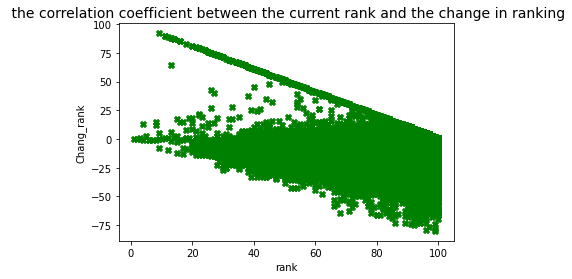

In [8]:
change_rank=Artist['last-week']-Artist['rank']
print('The summary statistics for the change in ranking from the previous week follow')
print(change_rank.describe())
plt.figure()
plt.scatter(Artist['rank'],Artist['Rank_new'],color='g',linestyle='None',marker='X')
plt.ylabel('Chang_rank',fontsize=10)
plt.xlabel('rank',fontsize=10)
plt.title(' the correlation coefficient between the current rank and the change in ranking',fontsize=14)
print('the correlation coefficient between the current rank and the change in ranking should be ')
print(Artist['rank'].corr(Artist['Rank_new']))

8. Using the new DataFrame, with unique entries only, create a histogram for the length of
time each entry spent in the charts. Describe and interpret your plot. Compute the summary
statistics for the length of time a song spends in the charts. Discuss these statistics in relation
to your histogram

count    29467.000000
mean        11.149082
std          8.287711
min          1.000000
25%          5.000000
50%         10.000000
75%         16.000000
max         87.000000
Name: weeks-on-board, dtype: float64

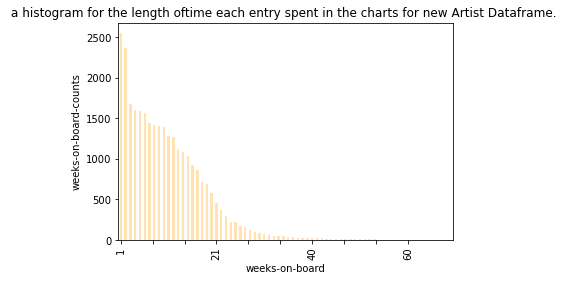

In [9]:
plt.figure()
Artist['weeks-on-board'].value_counts().plot(kind='bar',color='orange',alpha=0.3)
plt.xticks(np.linspace(0,60,10))
plt.ylabel("weeks-on-board-counts",fontsize=10)
plt.xlabel('weeks-on-board',fontsize=10)
plt.title(' a histogram for the length oftime each entry spent in the charts for new Artist Dataframe.  ')
Artist['weeks-on-board'].describe()

9. Using the new DataFrame, with unique entries only, create a histogram for the peak rank.
Describe and interpret your plot. Compute the summary statistics for peak rank. Discuss
these statistics in relation to your histogram.

count    29467.000000
mean        46.679302
std         30.541818
min          1.000000
25%         18.000000
50%         46.000000
75%         73.000000
max        100.000000
Name: peak-rank, dtype: float64

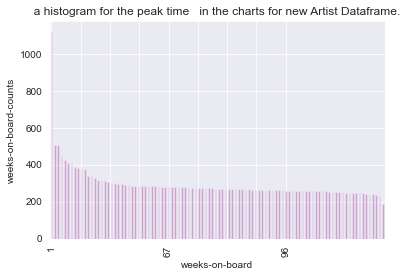

In [15]:
plt.figure()
Artist['peak-rank'].value_counts().plot(kind='bar',color='purple',alpha=0.3)
plt.xticks(np.linspace(0,70,9))
plt.ylabel("weeks-on-board-counts",fontsize=10)
plt.xlabel('weeks-on-board',fontsize=10)
plt.title('  a histogram for the peak time   in the charts for new Artist Dataframe.  ')
Artist['peak-rank'].describe()



F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    29467.000000
mean        46.679302
std         30.541818
min          1.000000
25%         18.000000
50%         46.000000
75%         73.000000
max        100.000000
Name: peak-rank, dtype: float64

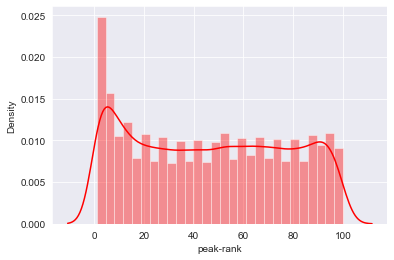

In [17]:
sns.set_style("darkgrid")
sns.distplot(Artist['peak-rank'],color='red')
Artist['peak-rank'].describe()

10. Write a short summary on what you have learnt about the Billboard Hot 100 Chart from this
analysis. (5-10 sentences)